# Netflix Movie Data Analysis

In [1]:
# pip install numpy pandas matplotlib seaborn

# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./resources/mymoviedb.csv", lineterminator="\n")

In [3]:
# Show first 5 movie details in table format
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
# Remove commas from 'Vote_Count' and convert to integer
df['Vote_Count'] = df['Vote_Count'].astype(str).str.replace(',', '').str.strip()
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')

# Remove commas from 'Vote_Average' and convert to float
df['Vote_Average'] = df['Vote_Average'].astype(str).str.replace(',', '').str.strip()
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce').astype('float64')

# Display updated data types and a few sample values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: Int64(1), float64(2), object(6)
memory usage: 701.4+ KB


In [5]:
 # exploring genres column
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# check for duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool

In [7]:
# check for duplicated rows (total count)
df.duplicated().sum()

np.int64(0)

In [8]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.0,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.0,0.000000
25%,16.127500,146.0,5.900000
50%,21.191000,444.0,6.500000
75%,35.174500,1376.0,7.100000
max,5083.954000,31077.0,10.000000


In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
# convert to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format="%d-%m-%Y", errors='coerce')

# confirming changes
print(df['Release_Date'].dtypes)

# extract year from full date
df['Release_Date'] = df['Release_Date'].dt.year.astype("Int64")
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]
Int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   Int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 711.0+ KB


In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Dropdown the columns

In [13]:
cols = ['Overview', 'Original_Language', 'Poster_Url\r']

In [14]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### Categorizing `Vote_Average` columns
- I will cut the `Vote_Average` values and make 4 categories - `Popular`, `Average`, `Below Average` and `Not Popular`

In [16]:
# Created user defined function for categorization of column
def categorize_col(df, col, labels):

    stats = df[col].describe()
    edges = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], bins = edges, labels = labels, include_lowest = True, duplicates='drop')

    return df

In [17]:
# define labels for edges
labels = ['Not Popular', 'Below Average', 'Average', 'Popular']

# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)

# confirming changes
df['Vote_Average'].unique()

['Popular', 'Below Average', 'Average', 'Not Popular', NaN]
Categories (4, object): ['Not Popular' < 'Below Average' < 'Average' < 'Popular']

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [19]:
# exploring column
df['Vote_Average'].value_counts()

Vote_Average
Not Popular      2567
Popular          2450
Average          2411
Below Average    2398
Name: count, dtype: int64

In [20]:
# dropping NaNs
df.dropna(inplace=True)

# confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


- I'd split genres into a list and then explode the dataframe to have only one genre per row for each movie

In [22]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(", ")

# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [23]:
# Casting column in category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  Int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  Int64   
 4   Vote_Average  25792 non-null  category
 5   Genre         25792 non-null  category
dtypes: Int64(2), category(2), float64(1), object(1)
memory usage: 907.8+ KB


In [25]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

### Data Visualization 
- Here, I'd use Matplotlib and seaborn for making some informative visuals to gain insights abut our data.

In [26]:
# setting up seaborn configurations
sns.set_style('whitegrid')

Q1. What is the most frequent genre of movies released on Netflix?

In [27]:
# showing stats. on genre column
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

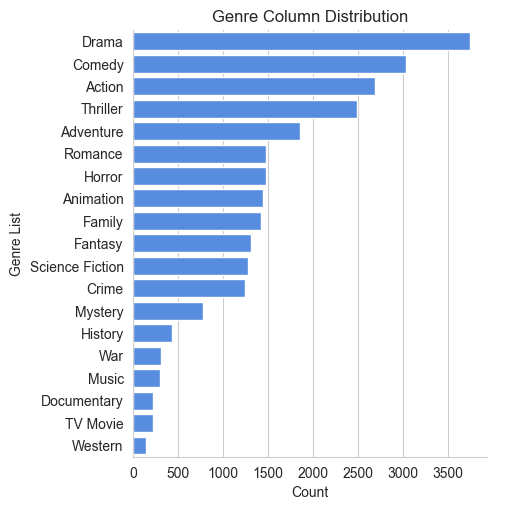

In [28]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order=df['Genre'].value_counts().index,
            color='#4287f5') 

plt.xlabel("Count")
plt.ylabel("Genre List")

plt.title('Genre Column Distribution')
plt.show()

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


Q2. What `genres` has highest `votes`?

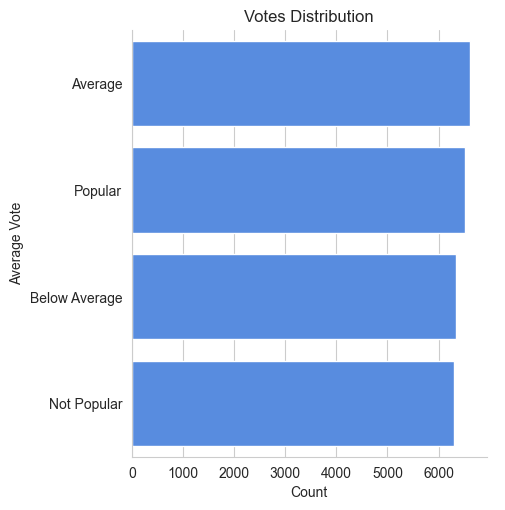

In [30]:
 # visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color='#4287f5')

plt.xlabel("Count")
plt.ylabel("Average Vote")

plt.title("Votes Distribution")
plt.show()

Q3. What movie got the highest popularity? What's its Genre?

In [31]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


Q4. What movie got the lowest popularity? What's its Genre?

In [32]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25789,1984,Threads,13.354,186,Popular,War
25790,1984,Threads,13.354,186,Popular,Drama
25791,1984,Threads,13.354,186,Popular,Science Fiction


Q5. Which year has the most filmmed movies?

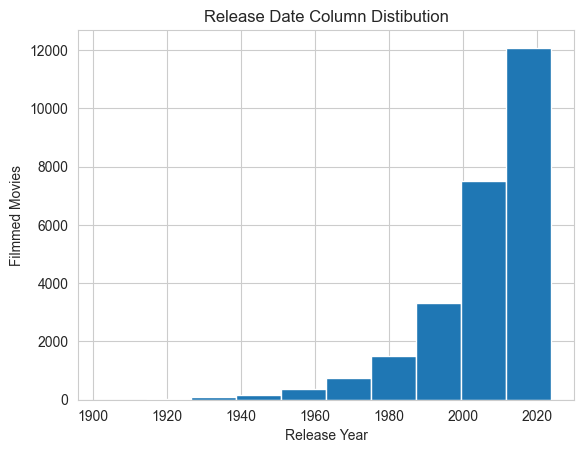

In [33]:
df['Release_Date'].hist()

plt.title("Release Date Column Distibution")

plt.xlabel("Release Year")
plt.ylabel("Filmmed Movies")

plt.show()

# Netflix Movie Data Analysis Project Summarization
## Objective
The goal of this project is to analyze Netflix movie data to gain insights into various aspects such as genres, popularity, votes, and release trends. The analysis involves cleaning, transforming, and visualizing the data to answer specific questions.

## Dataset Overview
The dataset contains information about movies available on Netflix, including:
- **Release_Date**: Year of release
- **Title**: Movie title
- **Popularity**: Popularity score
- **Vote_Count**: Number of votes
- **Vote_Average**: Average vote categorized into four labels: `Not Popular`, `Below Average`, `Average`, and `Popular`
- **Genre**: Movie genres (exploded to have one genre per row)

The dataset consists of **25,792 rows** and **6 columns** after preprocessing.

## Key Steps
1. **Data Cleaning**:
    - Removed commas from `Vote_Count` and `Vote_Average` columns and converted them to appropriate numeric types.
    - Converted `Release_Date` to datetime format and extracted the year.
    - Dropped unnecessary columns: `Overview`, `Original_Language`, and `Poster_Url`.

2. **Data Transformation**:
    - Categorized `Vote_Average` into four labels using custom-defined bins.
    - Split the `Genre` column into lists and exploded the dataframe to have one genre per row.
    - Converted `Genre` to a categorical data type.

3. **Exploratory Data Analysis (EDA)**:
    - Checked for duplicates and missing values.
    - Explored summary statistics and unique values for each column.

4. **Data Visualization**:
    - Visualized the distribution of genres to identify the most frequent genre.
    - Analyzed the distribution of votes and popularity.
    - Identified the most and least popular movies and their genres.
    - Examined the trend of movie releases over the years.

## Key Insights
1. **Most Frequent Genre**: The most common genre of movies released on Netflix.
2. **Genres with Highest Votes**: Identified genres with the highest average votes.
3. **Most Popular Movie**: The movie with the highest popularity score and its genre.
4. **Least Popular Movie**: The movie with the lowest popularity score and its genre.
5. **Year with Most Movies**: The year with the highest number of movie releases.

## Tools and Libraries
- **Python**: For data manipulation and analysis.
- **Pandas**: For data cleaning and transformation.
- **NumPy**: For numerical operations.
- **Matplotlib & Seaborn**: For data visualization.

## Conclusion
This project provides a comprehensive analysis of Netflix movie data, offering valuable insights into movie trends, popularity, and genres. The visualizations and findings can help stakeholders make data-driven decisions regarding content strategy and audience preferences.